In [1]:
from Louvain_algo import Louvain_algo
import networkx as nx
import utils
import pickle
import csv

False

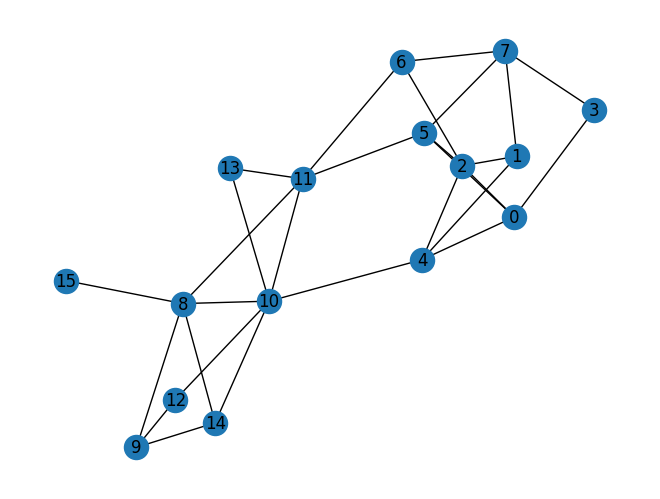

In [2]:
nodes = [(0,3),(1,7),(1,2),(1,4),(0,2),(0,4),(0,5),(2,4),(2,5),(2,6),(3,7),(5,7),(5,11),(6,7),(6,11),(8,11),(8,9),(8,10),(4,10),(8,14),(8,15),(9,14),(9,12),(10,11),(10,13),(10,12),(10,14),(11,13)]
G = nx.Graph()
G.add_edges_from(nodes)
nx.draw(G,with_labels=True)
G.has_edge(0,7)

In [3]:
len(G.edges)
algo = Louvain_algo(G)
communities = algo.run()


changes 10
changes 7
changes 0
changes 2
changes 0


In [4]:
print(len(communities))
communities

2


{4: {0, 1, 2, 3, 4, 5, 6, 7}, 13: {8, 9, 10, 11, 12, 13, 14, 15}}

In [5]:
communities = nx.community.louvain_communities(G)
communities

[{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]

In [6]:
communities = nx.community.louvain_communities(G,max_level=1)
print("after first passage",communities)
communities = nx.community.louvain_communities(G,max_level=2)
print("after second passage",communities)
communities = nx.community.louvain_communities(G,max_level=3)
print("after third passage",communities)

after first passage [{3, 6, 7}, {0, 1, 2, 4, 5}, {8, 9, 10, 12, 14, 15}, {11, 13}]
after second passage [{0, 1, 2, 3, 4, 5, 7}, {8, 9, 10, 12, 14, 15}, {11, 13, 6}]
after third passage [{0, 1, 2, 3, 4, 5, 6, 7}, {8, 9, 10, 11, 12, 13, 14, 15}]


In [7]:
#nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
#G = utils.Create_Graph(nodes=nodes , edges=edges)

In [8]:
def email():
    graph = nx.read_edgelist("data/email-Eu-core.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
email_graph = email()

In [9]:
algo = Louvain_algo(email_graph,1)
communities = algo.run()

changes 955
changes 191
changes 22
changes 4
changes 1
changes 0
changes 8
changes 0


In [10]:
print(len(communities))
print(nx.community.modularity(email_graph,list(communities.values())))

8
0.4202653633903607


In [11]:
communities = nx.community.louvain_communities(email_graph,seed = 123)
print(len(communities))
print(nx.community.modularity(email_graph,communities))

communities = nx.community.louvain_communities(email_graph,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(email_graph,max_level=3,seed=123)
print("after second passage",len(communities))

8
0.4308321076069302
after first passage 20
after second passage 8
after second passage 8


[1, 2, 3, 4, 5, 6, 7, 8, 9]
[(1, 2), (1, 3), (2, 3), (3, 6), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 7), (5, 8), (6, 9), (7, 8), (8, 9)]


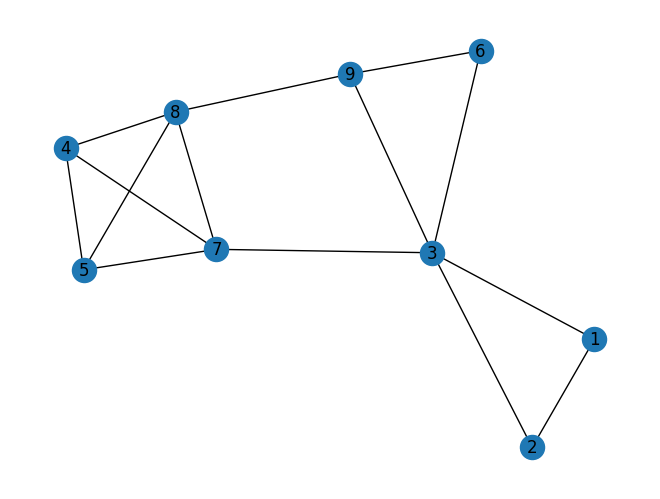

In [12]:
# Create a small graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

# Add edges
G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])

# Draw the graph
nx.draw(G, with_labels=True)
print(G.nodes)
print(G.edges)


In [13]:
%%time
algo = Louvain_algo(G,1)
communities = algo.run()

changes 6
changes 0
changes 1
changes 0
CPU times: user 710 µs, sys: 0 ns, total: 710 µs
Wall time: 699 µs


In [14]:
communities

{5: {4, 5, 7, 8}, 9: {1, 2, 3, 6, 9}}

In [15]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))
list(communities.values())

{5: {8, 4, 5, 7}, 9: {1, 2, 3, 6, 9}}
There are 2 communities
0.35714285714285715


[{4, 5, 7, 8}, {1, 2, 3, 6, 9}]

In [16]:
%%time
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
print(communities_built)

There are 2 communities.
0.35714285714285715
[{8, 4, 5, 7}, {1, 2, 3, 6, 9}]
CPU times: user 680 µs, sys: 28 µs, total: 708 µs
Wall time: 694 µs


In [17]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)
print("Is connected",nx.is_connected(graph))


The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496
Is connected False


In [18]:
s = list(nx.connected_components(graph))
G = graph.subgraph(s[0])
N = nx.number_of_nodes(G)
m = nx.number_of_edges(G)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  4158
The number of edges in the graph is: 13428


In [19]:
algo = Louvain_algo(G,1)

In [20]:
%%time
communities = algo.run()

changes 3144
changes 776
changes 169
changes 27
changes 5
changes 0
changes 657
changes 110
changes 16
changes 4
changes 1
changes 0
changes 152
changes 33
changes 6
changes 2
changes 0
changes 17
changes 1
changes 0
changes 0
CPU times: user 8.57 s, sys: 265 µs, total: 8.57 s
Wall time: 8.57 s


In [28]:
print(communities)
print("There are",len(communities),"communities")
print(nx.community.modularity(G,list(communities.values())))



{6206: {16385, 8193, 16386, 16389, 16392, 16395, 8205, 16, 16402, 16404, 27, 16413, 30, 16419, 8228, 36, 35, 8233, 42, 16431, 8245, 16437, 57, 65, 66, 16451, 8258, 8261, 8265, 16459, 8274, 16468, 16469, 8279, 8282, 8283, 8284, 91, 96, 16484, 16492, 111, 16496, 8305, 115, 117, 8311, 124, 125, 128, 16513, 16515, 131, 8325, 134, 8326, 16522, 140, 142, 8340, 8341, 8343, 8346, 158, 8362, 172, 16561, 16563, 179, 16566, 16568, 16569, 185, 16571, 16575, 201, 8396, 205, 8398, 8403, 16597, 16600, 16601, 224, 227, 8424, 236, 237, 16622, 8437, 245, 16629, 8443, 251, 16637, 8446, 8444, 258, 259, 16647, 264, 8458, 8459, 274, 16659, 278, 16664, 282, 8477, 286, 16671, 287, 8488, 16685, 16691, 312, 319, 16704, 8512, 16709, 16710, 327, 8518, 328, 331, 333, 16724, 8532, 340, 16727, 16728, 8541, 8543, 16736, 355, 8555, 367, 8559, 16751, 8562, 8563, 8566, 16764, 8575, 8577, 16771, 388, 8587, 8588, 397, 8591, 8592, 16785, 401, 8593, 16790, 8598, 409, 8603, 8604, 8605, 16801, 16804, 420, 8613, 16807, 16812, 

In [22]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
print(nx.community.modularity(G,communities_built))
communities = nx.community.louvain_communities(G,seed = 123)
print(len(communities))
print(nx.community.modularity(G,communities))

communities = nx.community.louvain_communities(G,max_level=1,seed=123)
print("after first passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=2,seed=123)
print("after second passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=3,seed=123)
print("after third passage",len(communities))
communities = nx.community.louvain_communities(G,max_level=4,seed=123)
print("after forth passage",len(communities))

There are 38 communities.
0.8481372736147083
43
0.8477628597902169
after first passage 868
after second passage 201
after third passage 55
after forth passage 43


Get the communities for the facebook graph and store it on the graph and csv file.

In [9]:
nodes,edges = utils.Load_data("nodes with communities.csv","edges without loops.csv")
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [10]:
algo = Louvain_algo(G,1)

In [11]:
communities = algo.run()

changes 18815
changes 7442
changes 2084
changes 797
changes 390
changes 283
changes 163
changes 94
changes 117
changes 67
changes 18
changes 3
changes 2
changes 0
changes 1584
changes 489
changes 96
changes 19
changes 3
changes 1
changes 0
changes 164
changes 33
changes 0
changes 7
changes 0


In [12]:
len(communities)

59

In [13]:
nx.community.modularity(G,list(communities.values()))
print(nx.community.modularity(G,list(communities.values())))
print("There are",len(communities),"communities.")

0.8147852082654957
There are 59 communities.


In [26]:
#Adding the community id to the graphs as attributes
def add_community_ids(G,node_lists,attribute):
    for i, nodes in enumerate(node_lists):
        for node in nodes:
            # Here you can set any attribute
            G.nodes[node][attribute] = i
    return G

In [28]:
added_G = add_community_ids(G,list(communities.values()),'Louvain_id')

In [44]:
def write_csv(G,csv_file_path):
    # Open the CSV file in write mode
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(['id']+list(G.nodes[0].keys())) # Add headers for node attributes if applicable
        
        # Write node information
        for node in G.nodes():
            # Get node attributes if available
            # For example, you might have node attributes stored as a dictionary
            node_attributes = G.nodes[node]
            
            # Write node information to CSV
            writer.writerow([node] + [node_attributes.get(attribute, '') for attribute in G.nodes[0].keys()])


In [45]:
write_csv(added_G,'nodes_with_Louvain_communities.csv')

In [36]:
import pickle
#In case of storeing the comunities 
with open('data/com0_', 'wb') as file:
    pickle.dump(communities, file)


In [19]:
G.number_of_nodes()

22470

In [13]:
communities_built = nx.community.louvain_communities(G)
print("There are",len(communities_built),"communities.")
nx.community.modularity(G,communities_built)

There are 63 communities.


0.8158254936882471

0.8145420188092388

In [24]:
communities_built

[{44,
  79,
  101,
  263,
  282,
  410,
  568,
  584,
  717,
  787,
  828,
  839,
  991,
  1126,
  1305,
  1394,
  1517,
  1523,
  1558,
  1618,
  1753,
  2052,
  2160,
  2432,
  2532,
  2864,
  2872,
  2971,
  3074,
  3103,
  3241,
  3372,
  3639,
  3852,
  3885,
  3981,
  4031,
  4077,
  4118,
  4278,
  4348,
  4401,
  4527,
  4751,
  4917,
  5010,
  5082,
  5165,
  5229,
  5317,
  5525,
  5589,
  5858,
  6147,
  6398,
  6635,
  6706,
  6745,
  6783,
  6836,
  7154,
  7228,
  7288,
  7355,
  7552,
  7554,
  7606,
  7800,
  7919,
  7978,
  8062,
  8641,
  8795,
  9034,
  9194,
  9288,
  9567,
  9641,
  9813,
  9996,
  9999,
  10625,
  10974,
  11137,
  11173,
  11248,
  11264,
  11286,
  11329,
  11349,
  11375,
  11473,
  11850,
  12025,
  12514,
  12745,
  12774,
  12870,
  13074,
  13140,
  13328,
  13383,
  13408,
  13675,
  13922,
  14016,
  14053,
  14127,
  14236,
  14703,
  14831,
  14935,
  14984,
  15332,
  15389,
  15416,
  15490,
  15880,
  15908,
  15930,
  16103,
  16105

In [13]:
G.subgraph([3466]).subgraph([937,5233,1031]).number_of_edges()

0

In [11]:
G.nodes()
G[3466]

AtlasView(FilterAtlas({937: {}, 5233: {}, 8579: {}, 10310: {}, 15931: {}, 17038: {}, 18720: {}, 19607: {}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x7e6435f10b80>))

In [10]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    if com_inv[n] not in gains.values():
        gains[1]=com_inv[n]
print(gains)


{1: 1}
CPU times: user 104 µs, sys: 74 µs, total: 178 µs
Wall time: 189 µs


In [11]:
%%time
nodes = range(5)
com = {0:{0,1},1:{2,3,4}}
com_inv = {0:0,1:0,2:1,3:1,4:1}
gains = {}
for n in nodes:
    gains[1]=com_inv[n]
print(gains)

{1: 1}
CPU times: user 135 µs, sys: 96 µs, total: 231 µs
Wall time: 246 µs


In [5]:
print("j")

j
